In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Network centrality

Centrality measures identify the most important nodes in the network:
- influencial nodes in social network
- nodes that disseminate information to many nodes or prevent epidemics
- hubs in a transportation network
- important pages on the Web
- nodes that prevent network from braking up

# Degree centrality

Important nodes have many connections. Undirected networks: degree, directed networks: in-degree or out-degree.

Degree is normalized by n-1, so degree of one means that the node is connected to all other nodes in the network.

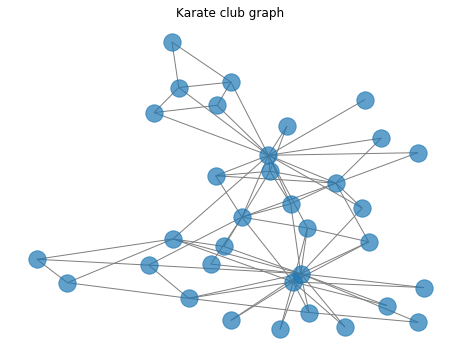

In [2]:
G = nx.karate_club_graph()

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, width=2, alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Karate club graph')
plt.axis('off');

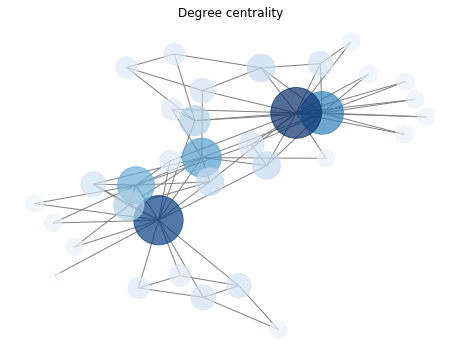

In [3]:
deg_centrality = nx.degree_centrality(G)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [5000 * deg_centrality[node] for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Degree centrality')
plt.axis('off');

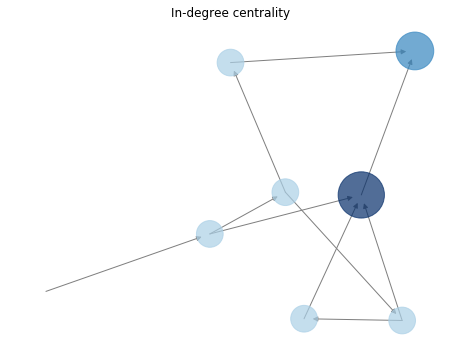

In [4]:
DG = nx.DiGraph()
DG.add_edge('A', 'B')
DG.add_edge('B', 'C')
DG.add_edge('C', 'D')
DG.add_edge('C', 'E')
DG.add_edge('D', 'F')
DG.add_edge('D', 'G')
DG.add_edge('F', 'G')
DG.add_edge('B', 'G')
DG.add_edge('E', 'H')
DG.add_edge('G', 'H')

in_degree_centrality = nx.in_degree_centrality(DG)
node_sizes = [5000 * in_degree_centrality[node] for node in list(DG.nodes())]

pos = nx.layout.spring_layout(DG)
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(DG, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, cmap=plt.cm.Blues)
edges = nx.draw_networkx_edges(DG, pos, edge_color='grey')
plt.title('In-degree centrality')
plt.axis('off');

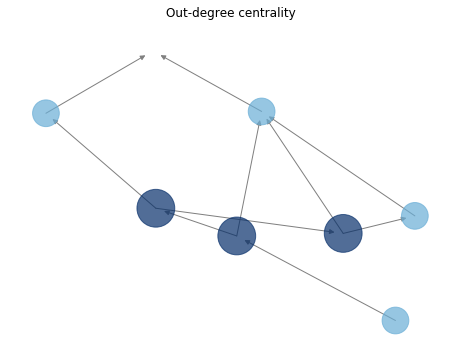

In [5]:
DG = nx.DiGraph()
DG.add_edge('A', 'B')
DG.add_edge('B', 'C')
DG.add_edge('C', 'D')
DG.add_edge('C', 'E')
DG.add_edge('D', 'F')
DG.add_edge('D', 'G')
DG.add_edge('F', 'G')
DG.add_edge('B', 'G')
DG.add_edge('E', 'H')
DG.add_edge('G', 'H')

out_degree_centrality = nx.out_degree_centrality(DG)
node_sizes = [5000 * out_degree_centrality[node] for node in list(DG.nodes())]

pos = nx.layout.spring_layout(DG)
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(DG, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, cmap=plt.cm.Blues)
edges = nx.draw_networkx_edges(DG, pos, edge_color='grey')
plt.title('Out-degree centrality')
plt.axis('off');

# Closeness centrality

Important nodes are close to other nodes

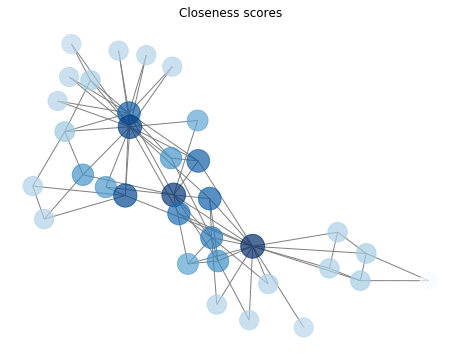

In [6]:
closeness_centrality = nx.closeness_centrality(G)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [1000 * closeness_centrality[node] for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Closeness scores')
plt.axis('off');

To compute node's centrality, we need to sum the distances from this node to all other nodes

In [7]:
sum(nx.shortest_path_length(G, 31).values())

61

Finaly, closeness is computed as number of all other nodes, divided by the sumed distances

In [8]:
(len(G.nodes()) - 1) / 61

0.5409836065573771

Let's see, if our calculations match with those that networkx performed!

In [9]:
closeness_centrality[31]

0.5409836065573771

# Disconnected nodes

There are situations in which some node are disconnected, or they are connected to one of the connected components. How do we measure closeness centrality in that situation?

R - a set of nodes that the node can reach
Closeness = |R|/|n-1| * |R| / sum of distance to nodes the node can reach

# Betweenness centrality

Important nodes are those who connect to other nodes. It's defined as a fraction of shortest paths that contain particular node.

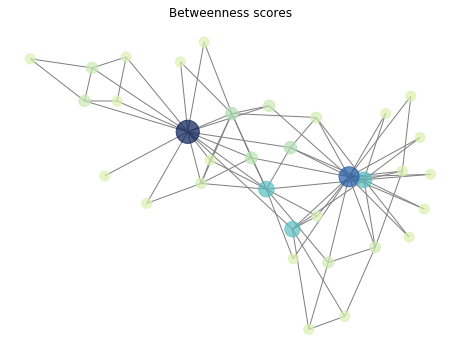

In [10]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [1000* betweenness_centrality[node] + 100 for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.YlGnBu)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Betweenness scores')
plt.axis('off');

This computation is extremely expensive, so we can try to approximate it by using only a sample of nodes. Parameter k let's us control it's size 

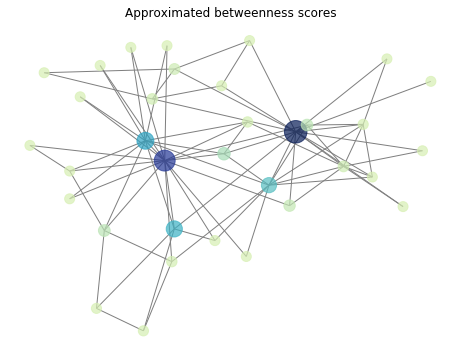

In [11]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False, k=10)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [1000* betweenness_centrality[node] + 100 for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.YlGnBu)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Approximated betweenness scores')
plt.axis('off');

We can also analyze a subset of nodes we want to analyze

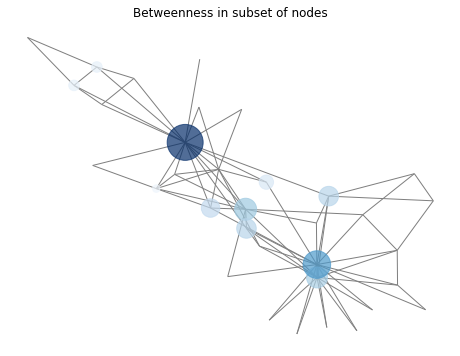

In [12]:
betweenness_centrality = nx.betweenness_centrality_subset(G, [33, 32, 20, 29, 15, 26, 14, 22, 9], 
                                                             [0, 3, 12, 10, 5, 11, 16, 6])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [50 * betweenness_centrality[node] for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Betweenness in subset of nodes')
plt.axis('off');

# Betweenness centrality for edges

We can also analyze centrality of edges

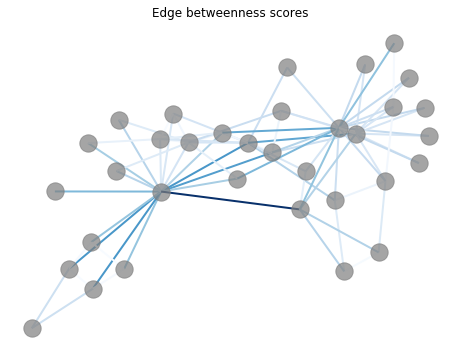

In [13]:
edge_betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=True)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

edge_sizes = [edge_betweenness_centrality[edge] for edge in list(G.edges())]
nx.draw_networkx_nodes(G, pos, alpha=0.7, node_color='grey')
nx.draw_networkx_edges(G, pos, edge_color=edge_sizes, edge_cmap=plt.cm.Blues, width=2)
plt.title('Edge betweenness scores')
plt.axis('off');

# Page Rank

Larry Page and Sergey Brin, the Google creators came up with an idea how to measure importance of web pages. They stated that important pages are important, because other important pages link to it.

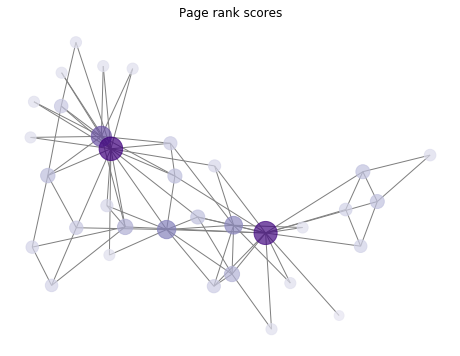

In [14]:
page_rank = nx.pagerank(G, alpha=0.85)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [5000 * page_rank[node] + 50 for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.Purples)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Page rank scores')
plt.axis('off');

# Hubs and authorities

Another way of representing importance of web pages is to measure it's hub and authority scores. Authorities are pages that are linked by good hubs, and hubs are pages that link to important pages

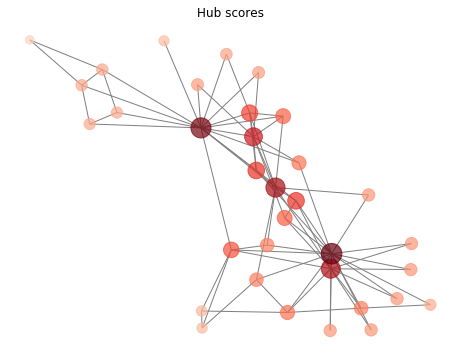

In [15]:
hubs, authorities = nx.hits(G)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [5000 * hubs[node] + 50 for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.Reds)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Hub scores')
plt.axis('off');

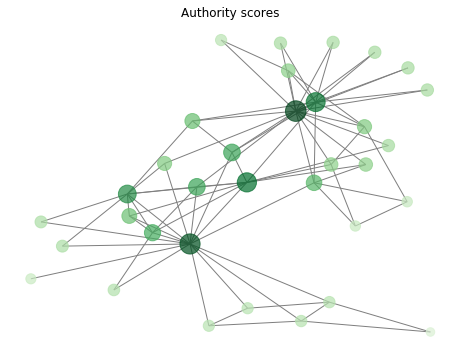

In [16]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [5000 * authorities[node] + 50 for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.Greens)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Authority scores')
plt.axis('off');

# Eigenvector centrality

Another centrality measures that takes into account that node's importance is influenced by its neighbours importance is eigenvector centrality. Centrality measures of the nodes are elements of eigenvector of adjacency matrix of the network.

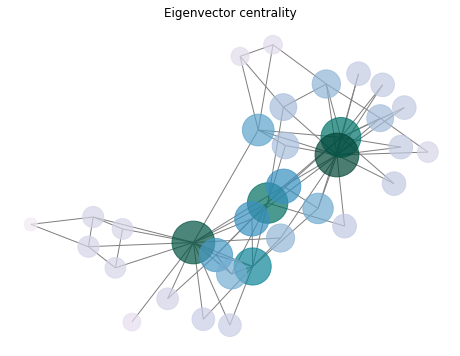

In [17]:
eigenvector_centrality = nx.eigenvector_centrality(G)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

node_sizes = [5000 * eigenvector_centrality[node] + 50 for node in list(G.nodes())]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, alpha=0.7, vmin=0, cmap=plt.cm.PuBuGn)
nx.draw_networkx_edges(G, pos, edge_color='grey')
plt.title('Eigenvector centrality')
plt.axis('off');